In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [2]:
df = pd.read_csv('WDI_5k_OHC_Updated.csv')
df.head()

Country Name Country Code  \
0  Africa Eastern and Southern          AFE   
1  Africa Eastern and Southern          AFE   
2  Africa Eastern and Southern          AFE   
3  Africa Eastern and Southern          AFE   
4  Africa Eastern and Southern          AFE   

                                      Indicator Name        Indicator Code  \
0            Access to electricity (% of population)        EG.ELC.ACCS.ZS   
1  Adjusted net enrollment rate, primary (% of pr...           SE.PRM.TENR   
2   Adjusted net national income (constant 2015 US$)        NY.ADJ.NNTY.KD   
3  Adjusted net national income per capita (annua...  NY.ADJ.NNTY.PC.KD.ZG   
4  Adjusted net national income per capita (const...     NY.ADJ.NNTY.PC.KD   

           1990          1991          1992          1993          1994  \
0  2.067025e+11  1.843945e+11  1.837405e+11  1.950123e+11  1.943210e+11   
1  2.067025e+11  1.843945e+11  1.837405e+11  1.950123e+11  1.943210e+11   
2  2.067025e+11  1.843945e+11  1.837405e+11  1.950123e+11  1.943210e+11   
3  2.067025e+11  1.843945e+11  1.837405e+11  1.950123e+11  1.943210e+11   
4  2.067025e+11  1.843945e+11  1.837405e+11  1.950123e+11  1.943210e+11   

           1995  ...          2012          2013          2014          2015  \
0  2.035337e+11  ...  3.168232e+01  3.161069e+01  3.182495e+01  3.374440e+01   
1  2.035337e+11  ...  4.205630e+11  4.761997e+11  4.873861e+11  4.907217e+11   
2  2.035337e+11  ...  6.207340e+11  6.495530e+11  6.887240e+11  7.368720e+11   
3  2.035337e+11  ... -1.039501e-01  1.812212e+00  3.167608e+00  4.074133e+00   
4  2.035337e+11  ...  1.123437e+03  1.143796e+03  1.180027e+03  1.228103e+03   

           2016          2017          2018          2019          2020  \
0  3.873335e+01  4.009216e+01  4.288098e+01  4.407391e+01  4.560960e+01   
1  5.490718e+11  5.527886e+11  5.726864e+11  6.642367e+11  7.302537e+11   
2  7.989410e+11  7.990940e+11  8.362670e+11  8.541110e+11  8.114050e+11   
3  5.543908e+00 -2.568358e+00  1.912120e+00 -5.427638e-01 -7.477902e+00   
4  1.296188e+03  1.262898e+03  1.287046e+03  1.280060e+03  1.184338e+03   

           2021  
0  8.911557e+11  
1  8.911557e+11  
2  8.911557e+11  
3  8.911557e+11  
4  8.911557e+11  

[5 rows x 36 columns]

In [3]:
df.shape

(5616, 36)

## Melting & Pivoting to Restructure Dataset for Easier Analysis & Understanding

In [7]:
# Keeping only the columns we need.
df = df[['Country Name', 'Indicator Name', 'Indicator Code'] + [str(i) for i in range(1999, 2020)]]


In [8]:
# Melting the years into a single column
# (Espino Romero, 2023) - see Long_form ipynb for acutual code

df = df.melt(id_vars=['Country Name', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Value')

In [9]:
# Pivot data to create a new column for each unique indicator
df = df.pivot_table(index=['Country Name', 'Year'], columns='Indicator Name', values='Value').reset_index()


In [12]:
df.shape

(1242, 106)

##### Cambodia & 2021 removed (not in scope and not data)

In [13]:
df  = df[df['Country_Name'] != 'Cambodia']
# cambodia accidentally made it through to the dataset. Removed.

In [14]:
df  = df[df['Year'] != '2021']
# 2021 needed to be removed as no real data.

In [15]:
df.shape

(1166, 106)

In [17]:
# df.to_csv("EDA_dataset.csv", index=False)
# used to save the dataset for Stephen and Kane to work on.

In [18]:
df.dtypes

Country_Name                                                                        object
Year                                                                                object
Access_to_electricity_(%_of_population)                                            float64
Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)           float64
Adjusted_net_national_income_(constant_2015_US$)                                   float64
                                                                                    ...   
Urban_population                                                                   float64
Urban_population_(%_of_total_population)                                           float64
Urban_population_growth_(annual_%)                                                 float64
Vulnerable_employment,_total_(%_of_total_employment)_(modeled_ILO_estimate)        float64
Wage_and_salaried_workers,_total_(%_of_total_employment)_(modeled_ILO_estimate)    float64

In [19]:
df.isnull().sum()

Country_Name                                                                       0
Year                                                                               0
Access_to_electricity_(%_of_population)                                            0
Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)           0
Adjusted_net_national_income_(constant_2015_US$)                                   0
                                                                                  ..
Urban_population                                                                   0
Urban_population_(%_of_total_population)                                           0
Urban_population_growth_(annual_%)                                                 0
Vulnerable_employment,_total_(%_of_total_employment)_(modeled_ILO_estimate)        0
Wage_and_salaried_workers,_total_(%_of_total_employment)_(modeled_ILO_estimate)    0
Length: 106, dtype: int64

In [20]:
df.columns

Index(['Country_Name', 'Year', 'Access_to_electricity_(%_of_population)',
       'Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)',
       'Adjusted_net_national_income_(constant_2015_US$)',
       'Adjusted_net_national_income_per_capita_(annual_%_growth)',
       'Adjusted_net_national_income_per_capita_(constant_2015_US$)',
       'Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_bottom_40%_of_population_(%)',
       'Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_total_population_(%)',
       'CPIA_social_protection_rating_(1=low_to_6=high)',
       ...
       'Taxes_on_international_trade_(current_LCU)', 'Trade_(%_of_GDP)',
       'Trade_in_services_(%_of_GDP)',
       'Unemployment,_total_(%_of_total_labor_force)_(modeled_ILO_estimate)',
       'Unemployment,_youth_total_(%_of_total_labor_force_ages_15-24)_(modeled_ILO_estimate)',
       'Urban_population', 'Urban_population_(%_of_t

In [22]:
print("Unique Country Values", df['Country_Name'].unique())

Unique Country Values ['Africa Eastern and Southern' 'Africa Western and Central' 'Angola'
 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'China' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Djibouti' 'Equatorial Guinea' 'Eritrea'
 'Eswatini' 'Ethiopia' 'Gabon' 'Gambia, The' 'Ghana' 'Guinea'
 'Guinea-Bissau' 'Kenya' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mauritius' 'Mozambique' 'Namibia' 'Niger' 'Nigeria'
 'Rwanda' 'Sao Tome and Principe' 'Seychelles' 'Sierra Leone' 'Somalia'
 'South Africa' 'South Sudan' 'Sub-Saharan Africa'
 'Sub-Saharan Africa (IDA & IBRD countries)'
 'Sub-Saharan Africa (excluding high income)' 'Sudan' 'Tanzania' 'Togo'
 'Uganda' 'World' 'Zambia' 'Zimbabwe']


In [30]:
unique_names_count = df['Country_Name'].nunique()
print("Countries/Regions in the Country_Name column:", unique_names_count)

# 6 regions, china, column heading, and 45 African states.

Countries/Regions in the Country_Name column: 53


In [31]:
unique_years_count = df['Year'].nunique()
print("Number of years in the Year column:", unique_years_count)

# 21 years and then the heading of the column 'year'

Number of years in the Year column: 22


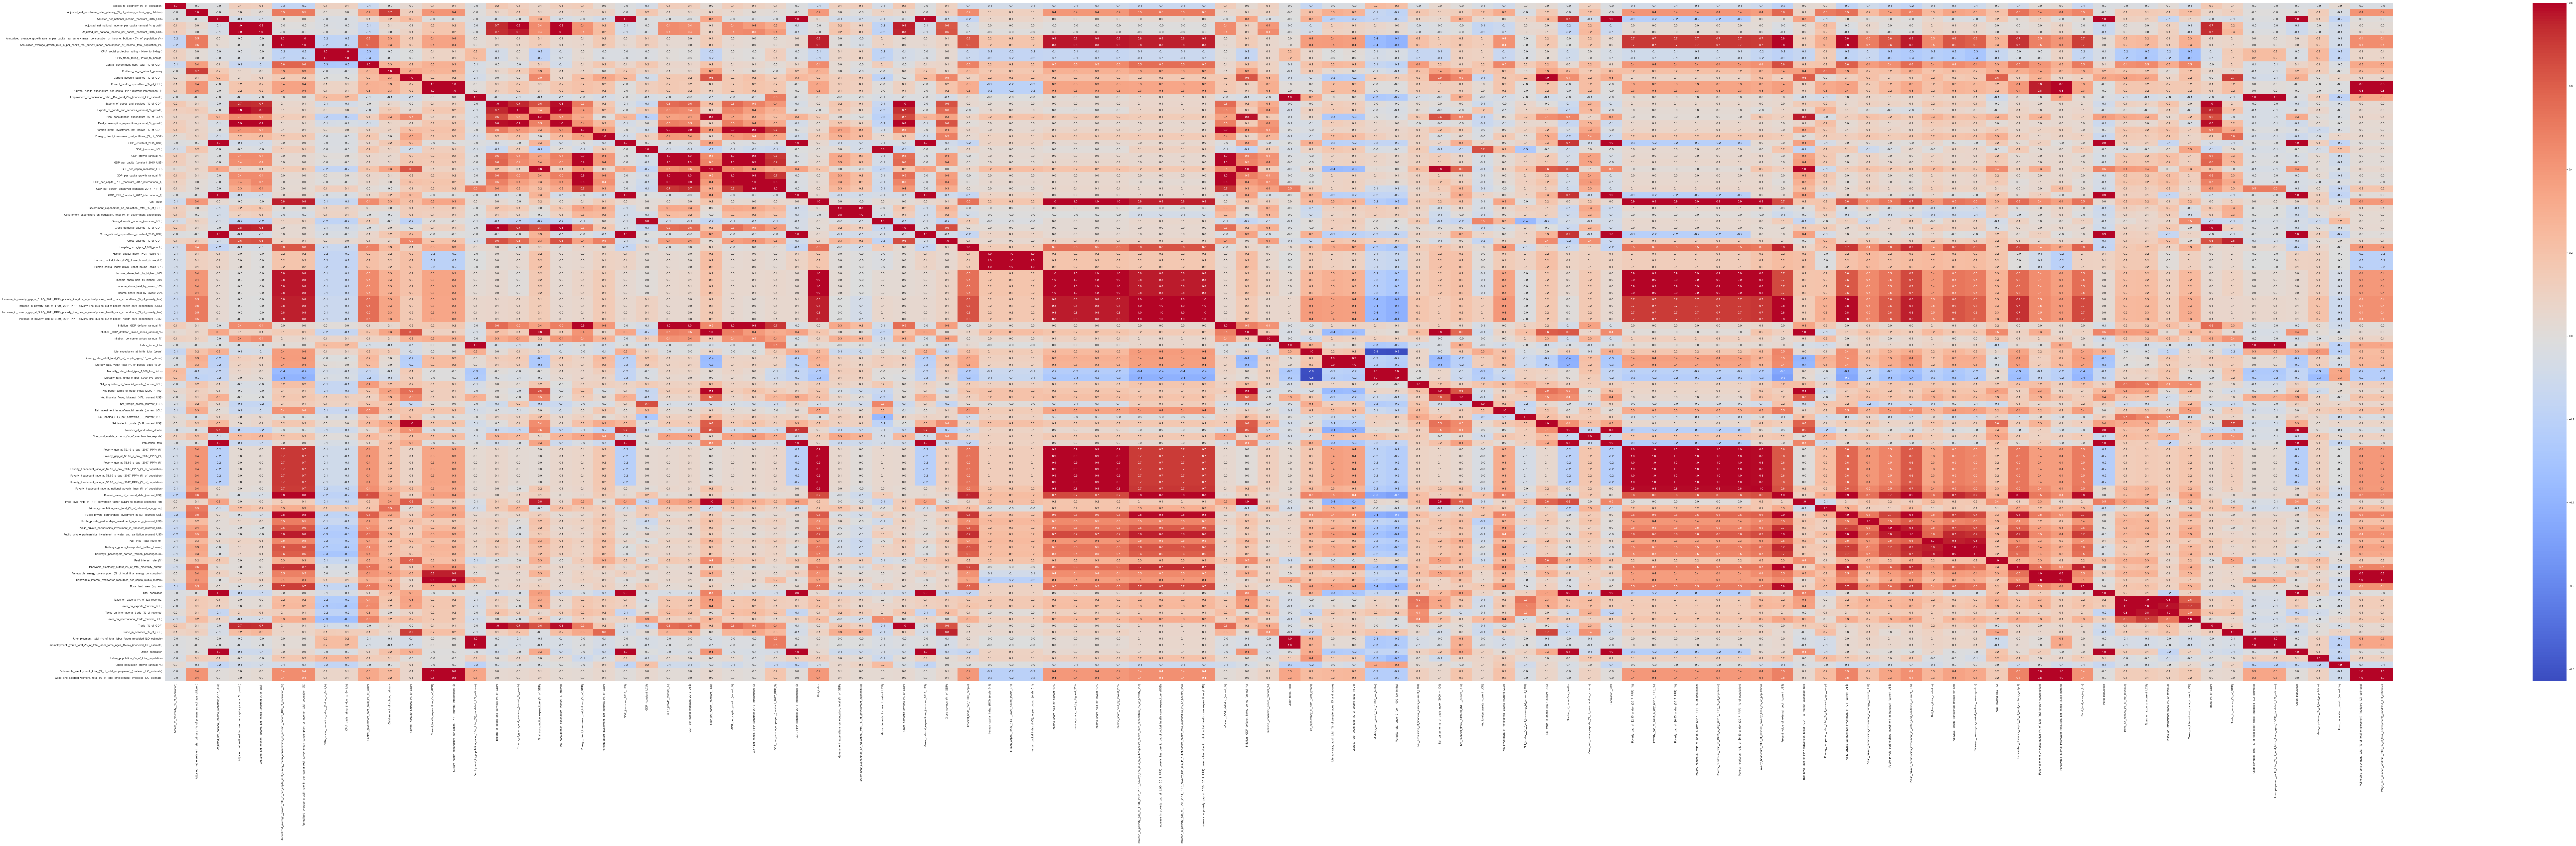

In [33]:
plt.figure(figsize=(200,50))
correlation=df.corr()
sns.heatmap(correlation,vmin=None,
    vmax=0.8,
    cmap='coolwarm',
    annot=True,
    fmt='.1f',
    linecolor='red',
    cbar=True);

# ref ML project: # (El-Gendy, 2023)
# Clearly there is too many columns, and we'll have to get more specific.

### Focusing Scope with a New Subset

In [ ]:
# Column list used to find the correct spelling of columns to make code below work.
column_list = df.columns.tolist()

for column_name in column_list:print(column_name)

In [69]:
# Here we are reducing the columns for easier analysis.
Economic_and_Poverty_columns = ['Country_Name',
                        'Year',
                        'GDP_growth_(annual_%)',
                        'GDP_per_capita_(constant_2015_US$)',
                        'GDP_per_capita_growth_(annual_%)','GDP_(constant_2015_US$)',
                        'Poverty_headcount_ratio_at_$2.15_a_day_(2017_PPP)_(%_of_population)',
                        'Poverty_headcount_ratio_at_$3.65_a_day_(2017_PPP)_(%_of_population)',
                        'Poverty_headcount_ratio_at_$6.85_a_day_(2017_PPP)_(%_of_population)',
                        'Poverty_headcount_ratio_at_national_poverty_lines_(%_of_population)',
                        'Income_share_held_by_highest_10%',
                        'Income_share_held_by_highest_20%',
                        'Income_share_held_by_lowest_10%',
                        'Income_share_held_by_lowest_20%',
                        'Gini_index',
                        'Human_capital_index_(HCI)_(scale_0-1)',
                        'Human_capital_index_(HCI),_lower_bound_(scale_0-1)',
                        'Human_capital_index_(HCI),_upper_bound_(scale_0-1)']

In [72]:
missing_columns = [col for col in Economic_and_Poverty_columns if col not in df.columns]

print("Missing columns:", missing_columns)

# This code was used to figure out which of the columns was spelt wrong in setting the new subset

Missing columns: []


In [ ]:
# Naming our new subset.
EDA_subset_one = df[Economic_and_Poverty_columns]

In [74]:
EDA_subset_one.shape
# Now we can have the 18 columns that we're interested in, in terms of economic and poverty indicators.

(1166, 18)

In [75]:
EDA_subset_one.columns

Index(['Country_Name', 'Year', 'GDP_growth_(annual_%)',
       'GDP_per_capita_(constant_2015_US$)',
       'GDP_per_capita_growth_(annual_%)', 'GDP_(constant_2015_US$)',
       'Poverty_headcount_ratio_at_$2.15_a_day_(2017_PPP)_(%_of_population)',
       'Poverty_headcount_ratio_at_$3.65_a_day_(2017_PPP)_(%_of_population)',
       'Poverty_headcount_ratio_at_$6.85_a_day_(2017_PPP)_(%_of_population)',
       'Poverty_headcount_ratio_at_national_poverty_lines_(%_of_population)',
       'Income_share_held_by_highest_10%', 'Income_share_held_by_highest_20%',
       'Income_share_held_by_lowest_10%', 'Income_share_held_by_lowest_20%',
       'Gini_index', 'Human_capital_index_(HCI)_(scale_0-1)',
       'Human_capital_index_(HCI),_lower_bound_(scale_0-1)',
       'Human_capital_index_(HCI),_upper_bound_(scale_0-1)'],
      dtype='object')

In [76]:
# Renaming columns that are too long (for heatmap) and ergonomics: 

shorter_column_names = {
    'GDP_growth_(annual_%)': 'GDP_%_growth',
    'GDP_per_capita_(constant_2015_US$)': 'GDP_per_capita',
    'GDP_per_capita_growth_(annual_%)': 'GDP_per_capita_%_growth',
    'GDP_(constant_2015_US$)': 'GDP_constant_2015',
    'Poverty_headcount_ratio_at_$2.15_a_day_(2017_PPP)_(%_of_population)': 'Pov_head_ratio_$2.15',
    'Poverty_headcount_ratio_at_$3.65_a_day_(2017_PPP)_(%_of_population)': 'Pov_head_ratio_$3.65',
    'Poverty_headcount_ratio_at_$6.85_a_day_(2017_PPP)_(%_of_population)': 'Pov_head_ratio_$6.85',
    'Poverty_headcount_ratio_at_national_poverty_lines_(%_of_population)': 'Pov_head_ratio_national_level',
    'Income_share_held_by_highest_10%': 'Income share top 10%',
    'Income_share_held_by_highest_20%':'Income share top 20%',
    'Income_share_held_by_lowest_10%': 'Income share bottom 10%',
    'Income_share_held_by_lowest_20%': 'Income share bottom 20%',
    'Human_capital_index_(HCI)_(scale_0-1)': 'HCI',
    'Human_capital_index_(HCI),_lower_bound_(scale_0-1)': 'HCI_lower_bound',
    'Human_capital_index_(HCI),_upper_bound_(scale_0-1)': 'HCI_upper_bound'}

EDA_subset_one = EDA_subset_one.rename(columns=shorter_column_names)
    

### Condensed Correlation Heatmap: Economic & Poverty Indicators

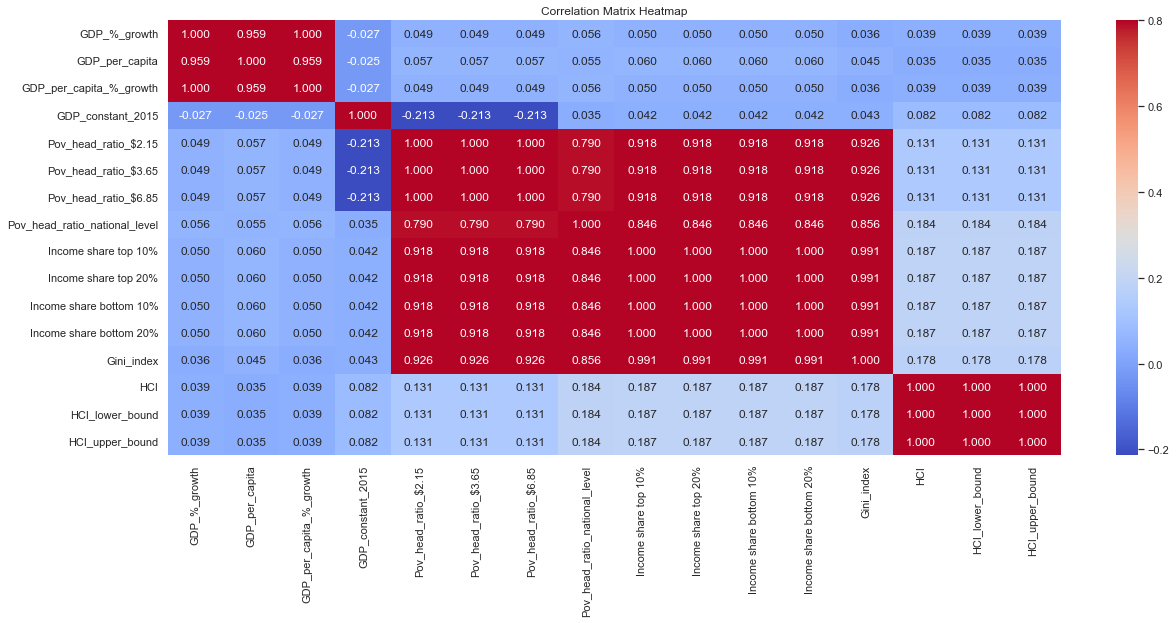

In [89]:
# Focusing our scope and shortening names we can now see correlation heatmap clearly.
# This shows the correlation between GDP indicators and poverty & inequality indicators.
# ref: ML customer churn code

plt.figure(figsize=(20,8))
correlation=EDA_subset_one.corr()
sns.heatmap(correlation,vmin=None,
    vmax=0.8,
    cmap='coolwarm',
    annot=True,
    fmt='.3f',
    linecolor='red',
    cbar=True);
plt.title('Correlation Matrix Heatmap')
plt.show()

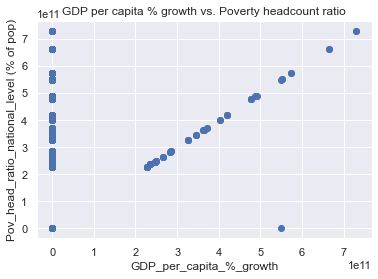

In [81]:
plt.scatter(EDA_subset_one['GDP_per_capita_%_growth'], EDA_subset_one['Pov_head_ratio_national_level'])
plt.xlabel('GDP_per_capita_%_growth')
plt.ylabel('Pov_head_ratio_national_level (% of pop)')
plt.title('GDP per capita % growth vs. Poverty headcount ratio')
plt.show()

# many countries have GDP%growth close to or at 0. 
# The 45 degree line of dots suggest a positive correlation between GDP % growth and Poverty ratio???
# outlier at x-axis = 5.5 is potentially China - Wouldn't admit poverty level in population.

### Looking at Sub-Saharan Africa GDP/Poverty Relationship

###### When using a line plot to investigate the relationship of GDP and the Poverty Headcount Ratio, we found that:
###### - Important to use the twinx function of matplotlib in order to be able to read the graphs better.
###### - GDP per Capita % a more informative GDP indicator. The negative relationship makes more sense, it takes into account changes in average income per person and so we chose to use it as it provides a better representation of the relationshp between economic growth & poverty reduction.

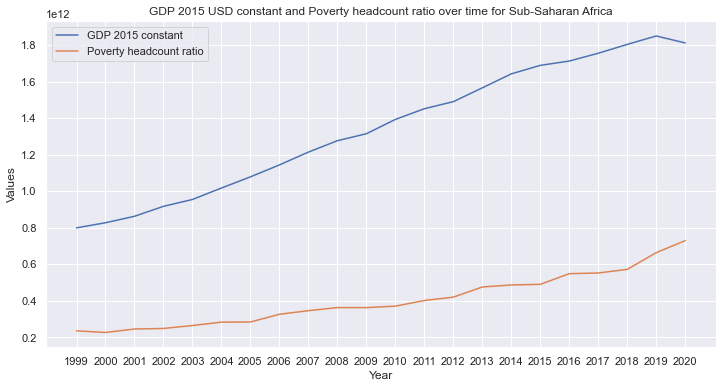

In [132]:
selected_country = 'Sub-Saharan Africa'
# By putting selected_country here we can easily reuse code.
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == selected_country]

plt.figure(figsize=(12, 6)) 
plt.plot(country_data['Year'], country_data['GDP_constant_2015'], label='GDP 2015 constant')
plt.plot(country_data['Year'], country_data['Pov_head_ratio_national_level'], label='Poverty headcount ratio')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title(f"GDP 2015 USD constant and Poverty headcount ratio over time for Sub-Saharan Africa")
plt.legend()
plt.show()

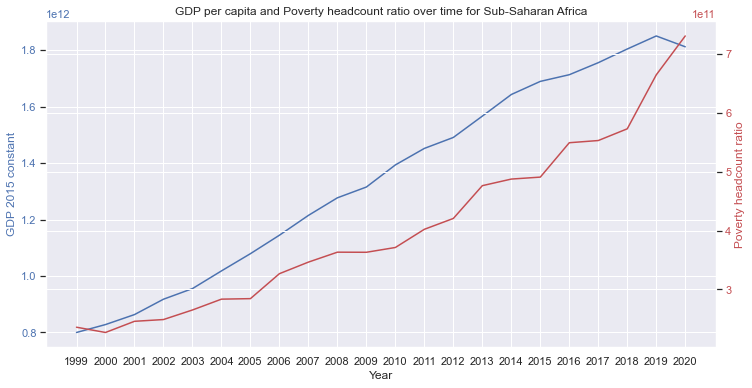

In [162]:
selected_country = 'Sub-Saharan Africa'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == selected_country ]

plt.figure(figsize=(12, 6))

# GDP line
ax1 = plt.gca()
ax1.plot(country_data['Year'], country_data['GDP_constant_2015'], label='GDP 2015 constant', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP 2015 constant', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Poverty ratio line
ax2 = ax1.twinx()
ax2.plot(country_data['Year'], country_data['Pov_head_ratio_national_level'], label='Poverty headcount ratio', color='r')
ax2.set_ylabel('Poverty headcount ratio', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("GDP per capita and Poverty headcount ratio over time for Sub-Saharan Africa")
plt.show()

<Figure size 1080x360 with 0 Axes>

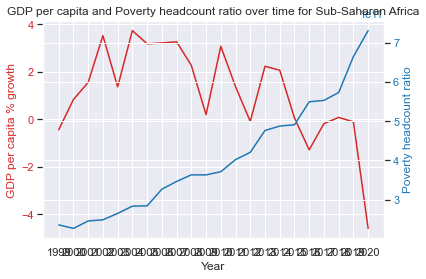

In [126]:
selected_country = 'Sub-Saharan Africa'
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == selected_country]

plt.figure(figsize=(15, 5))

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita % growth', color=color)
ax1.plot(country_data['Year'], country_data['GDP_per_capita_%_growth'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() # (Himani56, n.d.; matplotlib.org, n.d.)

color = 'tab:blue'
ax2.set_ylabel('Poverty headcount ratio', color=color)
ax2.plot(country_data['Year'], country_data['Pov_head_ratio_national_level'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("GDP per capita and Poverty headcount ratio over time for Sub-Saharan Africa")
plt.show();

### Looking at Sub-Saharan Africa (excluding high income) GDP/Poverty Relationship


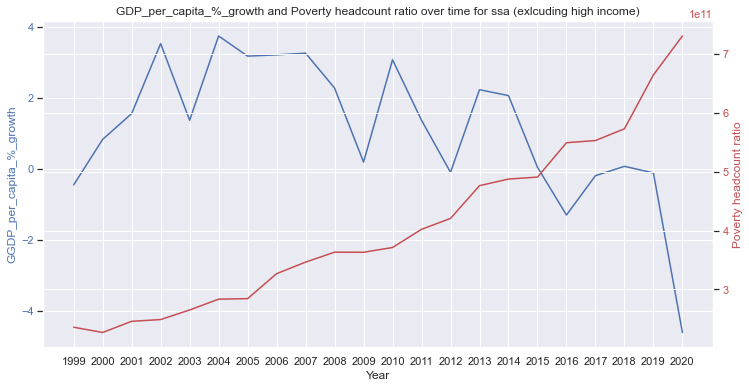

In [161]:
selected_country = 'Sub-Saharan Africa (excluding high income)'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == selected_country ]

plt.figure(figsize=(12, 6))

# GDP % growth line
ax1 = plt.gca()
ax1.plot(country_data['Year'], country_data['GDP_per_capita_%_growth'], label='GDP_per_capita_%_growth', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('GGDP_per_capita_%_growth', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Poverty ratio line
ax2 = ax1.twinx()
ax2.plot(country_data['Year'], country_data['Pov_head_ratio_national_level'], label='Poverty headcount ratio', color='r')
ax2.set_ylabel('Poverty headcount ratio', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("GDP_per_capita_%_growth and Poverty headcount ratio over time for ssa (exlcuding high income)")
plt.show()

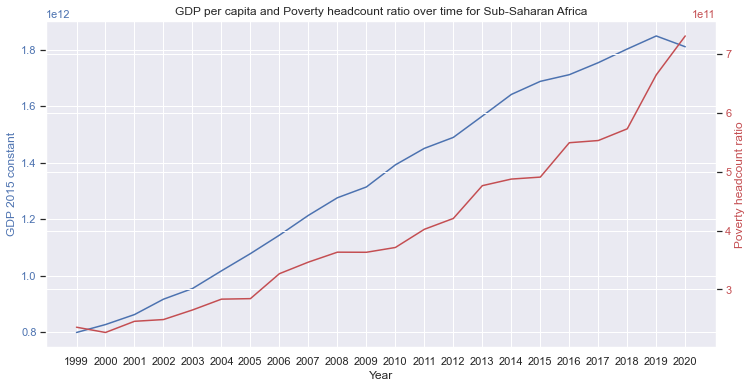

In [143]:
selected_country = 'Sub-Saharan Africa (excluding high income)'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == selected_country ]

plt.figure(figsize=(12, 6))

# GDP line
ax1 = plt.gca()
ax1.plot(country_data['Year'], country_data['GDP_constant_2015'], label='GDP 2015 constant', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP 2015 constant', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Poverty ratio line
ax2 = ax1.twinx()
ax2.plot(country_data['Year'], country_data['Pov_head_ratio_national_level'], label='Poverty headcount ratio', color='r')
ax2.set_ylabel('Poverty headcount ratio', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("GDP per capita and Poverty headcount ratio over time for Sub-Saharan Africa")
plt.show()

### Looking at Specific Countries GDP/Poverty Relationship


#### Angola GDP/Poverty 

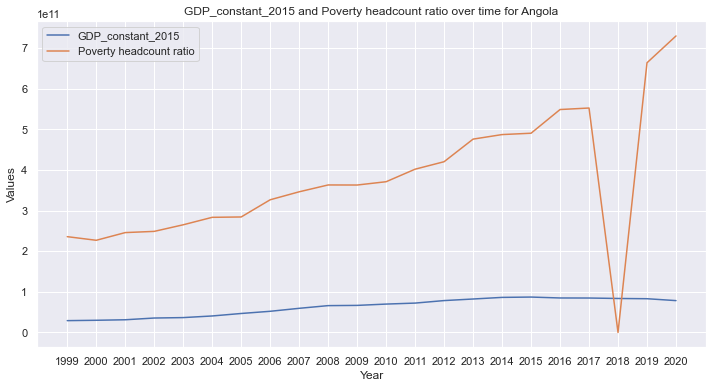

In [145]:
selected_country = 'Angola'
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == selected_country]

plt.figure(figsize=(12, 6)) 
plt.plot(country_data['Year'], country_data['GDP_constant_2015'], label='GDP_constant_2015')
plt.plot(country_data['Year'], country_data['Pov_head_ratio_national_level'], label='Poverty headcount ratio')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title(f"GDP_constant_2015 and Poverty headcount ratio over time for Angola")
plt.legend()
plt.show()

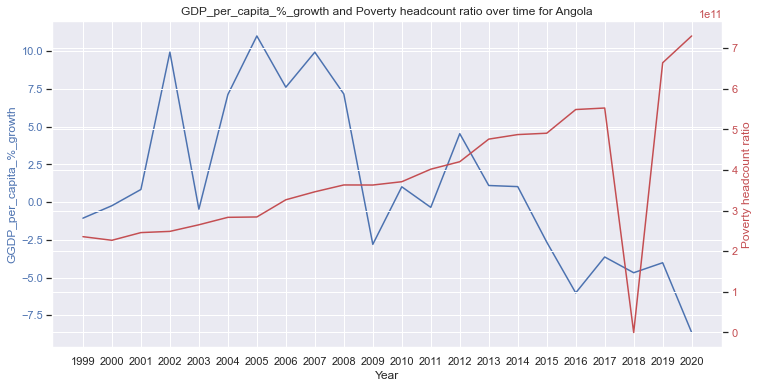

In [146]:
selected_country = 'Angola'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == selected_country ]

plt.figure(figsize=(12, 6))

# GDP line
ax1 = plt.gca()
ax1.plot(country_data['Year'], country_data['GDP_per_capita_%_growth'], label='GDP_per_capita_%_growth', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('GGDP_per_capita_%_growth', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Poverty ratio line
ax2 = ax1.twinx()
ax2.plot(country_data['Year'], country_data['Pov_head_ratio_national_level'], label='Poverty headcount ratio', color='r')
ax2.set_ylabel('Poverty headcount ratio', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("GDP_per_capita_%_growth and Poverty headcount ratio over time for Angola")
plt.show()

# This seems to be the most telling graph so we will repeat it for different nations

#### Namibia  GDP/Poverty

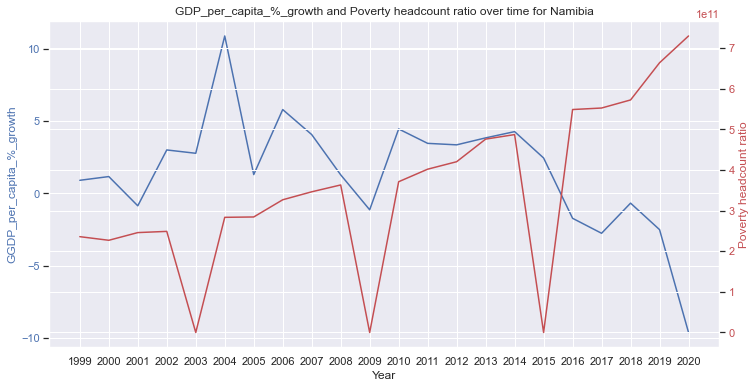

In [148]:
selected_country = 'Namibia'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == selected_country ]

plt.figure(figsize=(12, 6))

# GDP line
ax1 = plt.gca()
ax1.plot(country_data['Year'], country_data['GDP_per_capita_%_growth'], label='GDP_per_capita_%_growth', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('GGDP_per_capita_%_growth', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Poverty ratio line
ax2 = ax1.twinx()
ax2.plot(country_data['Year'], country_data['Pov_head_ratio_national_level'], label='Poverty headcount ratio', color='r')
ax2.set_ylabel('Poverty headcount ratio', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("GDP_per_capita_%_growth and Poverty headcount ratio over time for Namibia")
plt.show()

#### Tanzania  GDP/Poverty

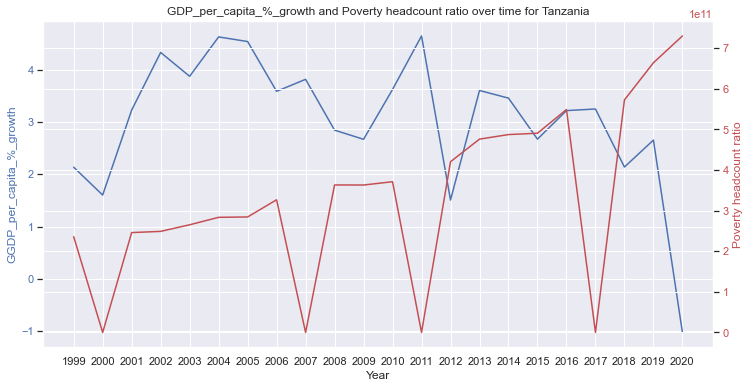

In [149]:
selected_country = 'Tanzania'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == selected_country ]

plt.figure(figsize=(12, 6))

# GDP line
ax1 = plt.gca()
ax1.plot(country_data['Year'], country_data['GDP_per_capita_%_growth'], label='GDP_per_capita_%_growth', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('GGDP_per_capita_%_growth', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Poverty ratio line
ax2 = ax1.twinx()
ax2.plot(country_data['Year'], country_data['Pov_head_ratio_national_level'], label='Poverty headcount ratio', color='r')
ax2.set_ylabel('Poverty headcount ratio', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("GDP_per_capita_%_growth and Poverty headcount ratio over time for Tanzania")
plt.show()

#### Nigeria  GDP/Poverty

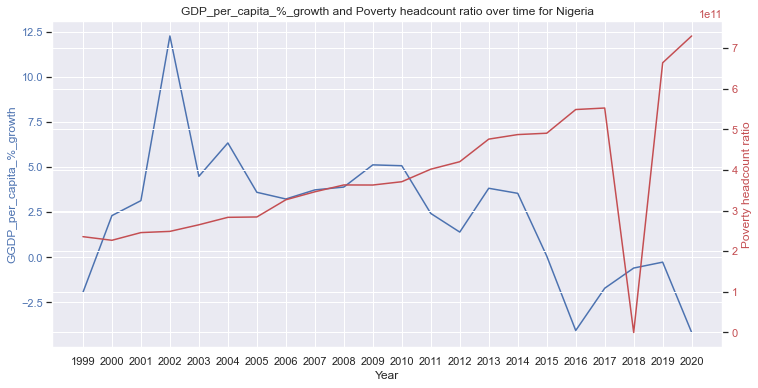

In [152]:
selected_country = 'Nigeria'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == selected_country ]

plt.figure(figsize=(12, 6))

# GDP line
ax1 = plt.gca()
ax1.plot(country_data['Year'], country_data['GDP_per_capita_%_growth'], label='GDP_per_capita_%_growth', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('GGDP_per_capita_%_growth', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Poverty ratio line
ax2 = ax1.twinx()
ax2.plot(country_data['Year'], country_data['Pov_head_ratio_national_level'], label='Poverty headcount ratio', color='r')
ax2.set_ylabel('Poverty headcount ratio', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("GDP_per_capita_%_growth and Poverty headcount ratio over time for Nigeria")
plt.show()

#### Ethiopia  GDP/Poverty

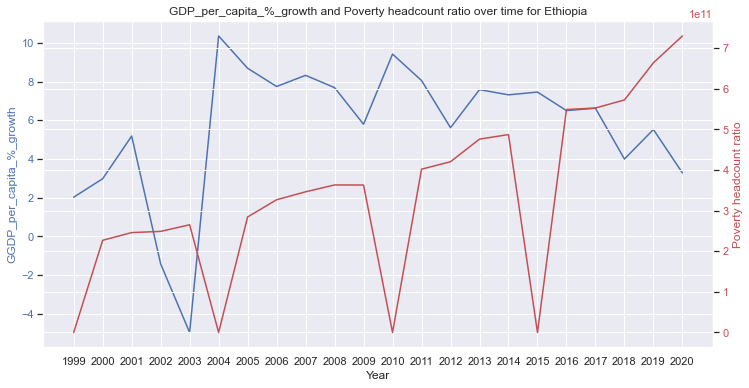

In [153]:
selected_country = 'Ethiopia'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == selected_country ]

plt.figure(figsize=(12, 6))

# GDP line
ax1 = plt.gca()
ax1.plot(country_data['Year'], country_data['GDP_per_capita_%_growth'], label='GDP_per_capita_%_growth', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('GGDP_per_capita_%_growth', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Poverty ratio line
ax2 = ax1.twinx()
ax2.plot(country_data['Year'], country_data['Pov_head_ratio_national_level'], label='Poverty headcount ratio', color='r')
ax2.set_ylabel('Poverty headcount ratio', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("GDP_per_capita_%_growth and Poverty headcount ratio over time for Ethiopia")
plt.show()

#### Kenya  GDP/Poverty

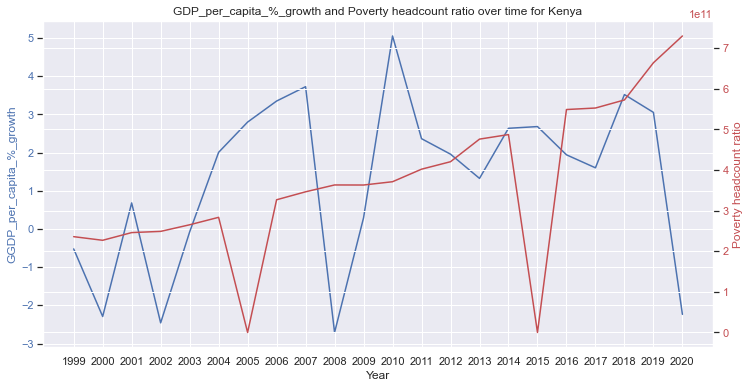

In [154]:
selected_country = 'Kenya'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == selected_country ]

plt.figure(figsize=(12, 6))

# GDP line
ax1 = plt.gca()
ax1.plot(country_data['Year'], country_data['GDP_per_capita_%_growth'], label='GDP_per_capita_%_growth', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('GGDP_per_capita_%_growth', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Poverty ratio line
ax2 = ax1.twinx()
ax2.plot(country_data['Year'], country_data['Pov_head_ratio_national_level'], label='Poverty headcount ratio', color='r')
ax2.set_ylabel('Poverty headcount ratio', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("GDP_per_capita_%_growth and Poverty headcount ratio over time for Kenya")
plt.show()

#### South Africa  GDP/Poverty

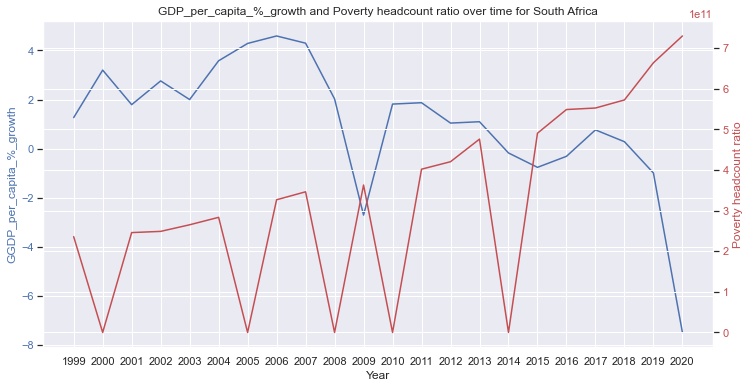

In [155]:
selected_country = 'South Africa'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == selected_country ]

plt.figure(figsize=(12, 6))

# GDP line
ax1 = plt.gca()
ax1.plot(country_data['Year'], country_data['GDP_per_capita_%_growth'], label='GDP_per_capita_%_growth', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('GGDP_per_capita_%_growth', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Poverty ratio line
ax2 = ax1.twinx()
ax2.plot(country_data['Year'], country_data['Pov_head_ratio_national_level'], label='Poverty headcount ratio', color='r')
ax2.set_ylabel('Poverty headcount ratio', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("GDP_per_capita_%_growth and Poverty headcount ratio over time for South Africa")
plt.show()

#### Eswatini  GDP/Poverty

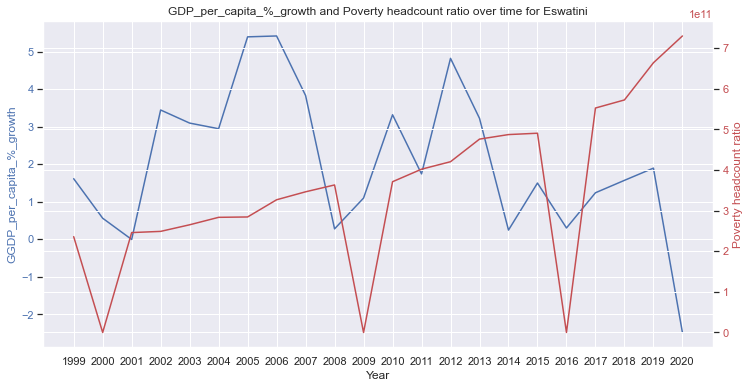

In [156]:
selected_country = 'Eswatini'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == selected_country ]

plt.figure(figsize=(12, 6))

# GDP line
ax1 = plt.gca()
ax1.plot(country_data['Year'], country_data['GDP_per_capita_%_growth'], label='GDP_per_capita_%_growth', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('GGDP_per_capita_%_growth', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Poverty ratio line
ax2 = ax1.twinx()
ax2.plot(country_data['Year'], country_data['Pov_head_ratio_national_level'], label='Poverty headcount ratio', color='r')
ax2.set_ylabel('Poverty headcount ratio', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("GDP_per_capita_%_growth and Poverty headcount ratio over time for Eswatini")
plt.show()

#### World  GDP/Poverty

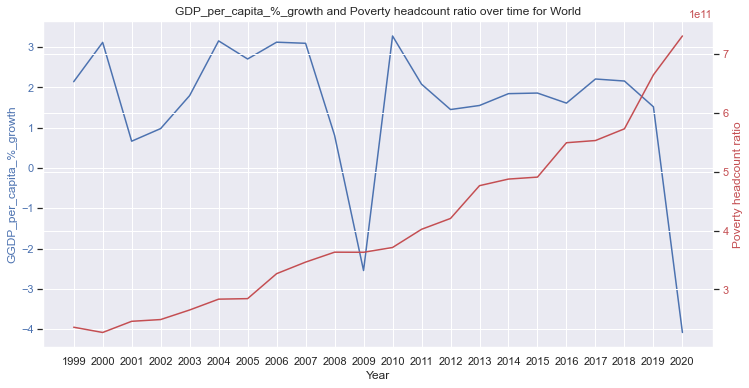

In [157]:
selected_country = 'World'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == selected_country ]

plt.figure(figsize=(12, 6))

# GDP line
ax1 = plt.gca()
ax1.plot(country_data['Year'], country_data['GDP_per_capita_%_growth'], label='GDP_per_capita_%_growth', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('GGDP_per_capita_%_growth', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Poverty ratio line
ax2 = ax1.twinx()
ax2.plot(country_data['Year'], country_data['Pov_head_ratio_national_level'], label='Poverty headcount ratio', color='r')
ax2.set_ylabel('Poverty headcount ratio', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("GDP_per_capita_%_growth and Poverty headcount ratio over time for World")
plt.show()

### Looking at Inequality & Development 

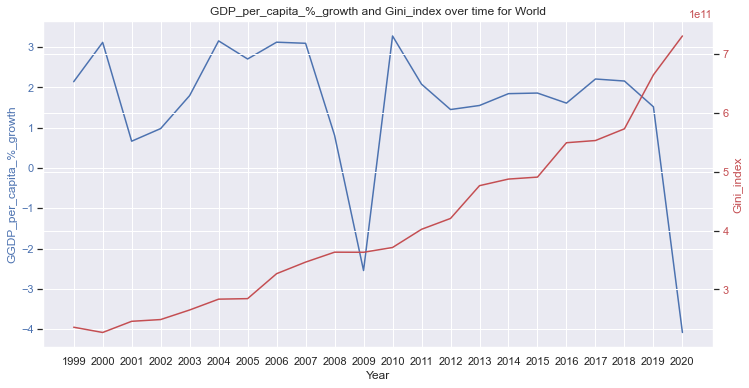

In [164]:
selected_country = 'World'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == selected_country ]

plt.figure(figsize=(12, 6))

# GDP line
ax1 = plt.gca()
ax1.plot(country_data['Year'], country_data['GDP_per_capita_%_growth'], label='GDP_per_capita_%_growth', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('GGDP_per_capita_%_growth', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Poverty ratio line
ax2 = ax1.twinx()
ax2.plot(country_data['Year'], country_data['Gini_index'], label='Gini_index', color='r')
ax2.set_ylabel('Gini_index', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("GDP_per_capita_%_growth and Gini_index over time for World")
plt.show()

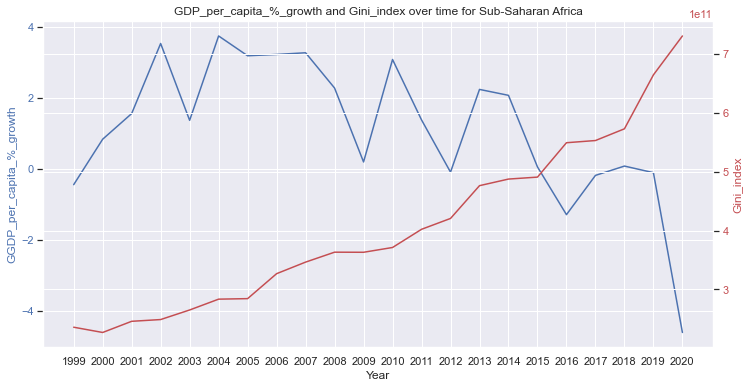

In [165]:
selected_country = 'Sub-Saharan Africa'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == selected_country ]

plt.figure(figsize=(12, 6))

# GDP line
ax1 = plt.gca()
ax1.plot(country_data['Year'], country_data['GDP_per_capita_%_growth'], label='GDP_per_capita_%_growth', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('GGDP_per_capita_%_growth', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Poverty ratio line
ax2 = ax1.twinx()
ax2.plot(country_data['Year'], country_data['Gini_index'], label='Gini_index', color='r')
ax2.set_ylabel('Gini_index', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("GDP_per_capita_%_growth and Gini_index over time for Sub-Saharan Africa")
plt.show()

##### Above graphs show that Gini Index is almost identical to PHR line

### Scatter plots showing GDP & Inequality Relationship

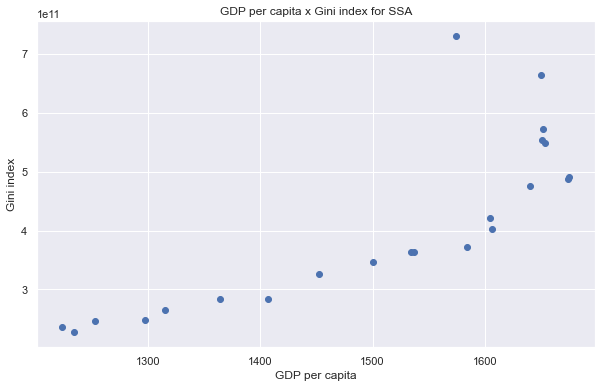

In [169]:
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == 'Sub-Saharan Africa']

plt.figure(figsize=(10, 6))
plt.scatter(country_data['GDP_per_capita'], country_data['Gini_index'])
plt.xlabel('GDP per capita')
plt.ylabel('Gini index')
plt.title(f'GDP per capita x Gini index for SSA')
plt.show()

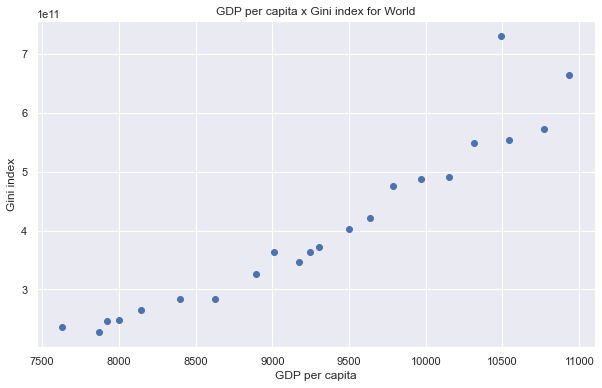

In [173]:
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == 'World']

plt.figure(figsize=(10, 6))
plt.scatter(country_data['GDP_per_capita'], country_data['Gini_index'])
plt.xlabel('GDP per capita')
plt.ylabel('Gini index')
plt.title(f'GDP per capita x Gini index for World')
plt.show()

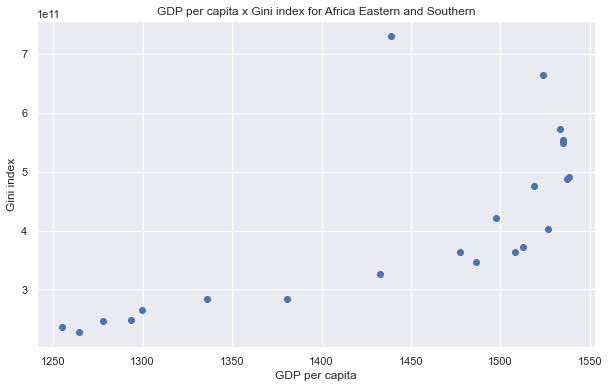

In [171]:
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == 'Africa Eastern and Southern']

plt.figure(figsize=(10, 6))
plt.scatter(country_data['GDP_per_capita'], country_data['Gini_index'])
plt.xlabel('GDP per capita')
plt.ylabel('Gini index')
plt.title(f'GDP per capita x Gini index for Africa Eastern and Southern')
plt.show()

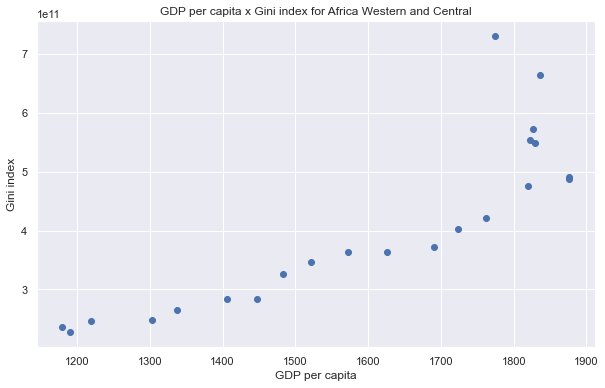

In [172]:
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == 'Africa Western and Central']

plt.figure(figsize=(10, 6))
plt.scatter(country_data['GDP_per_capita'], country_data['Gini_index'])
plt.xlabel('GDP per capita')
plt.ylabel('Gini index')
plt.title(f'GDP per capita x Gini index for Africa Western and Central')
plt.show()

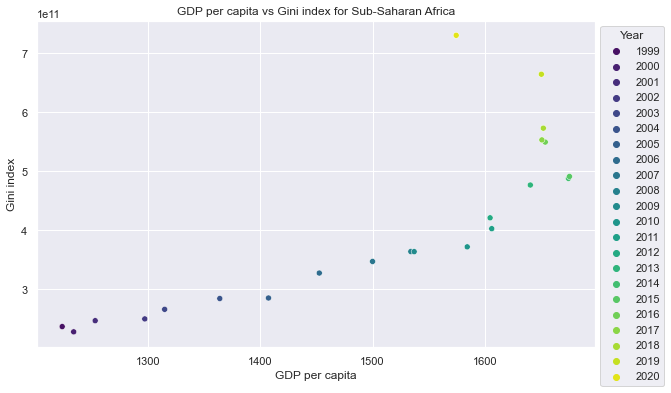

In [182]:
country_name = 'Sub-Saharan Africa'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == country_name]
# allows for easy copy & pasting of code

#This time we're making the year = hue so we can get a clearer idea of whats happening. 

fig, ax = plt.subplots(figsize=(10, 6))
scatter = sns.scatterplot(
    data=country_data,
    x='GDP_per_capita',
    y='Gini_index',
    hue='Year',
    palette='viridis',
    ax=ax
)

ax.set_title(f"GDP per capita vs Gini index for {country_name}")
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Gini index")
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### Exploring Angola's GDP & Inequality Relationship


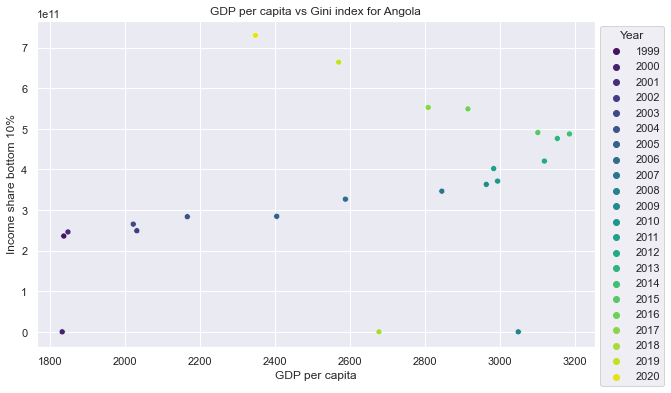

In [190]:
country_name = 'Angola'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == country_name]

fig, ax = plt.subplots(figsize=(10, 6))

scatter = sns.scatterplot(
    data=country_data,
    x='GDP_per_capita',
    y='Income share bottom 10%',
    hue='Year',
    palette='viridis',
    ax=ax
)

ax.set_title(f"GDP per capita vs Gini index for {country_name}")
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Income share bottom 10%")
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


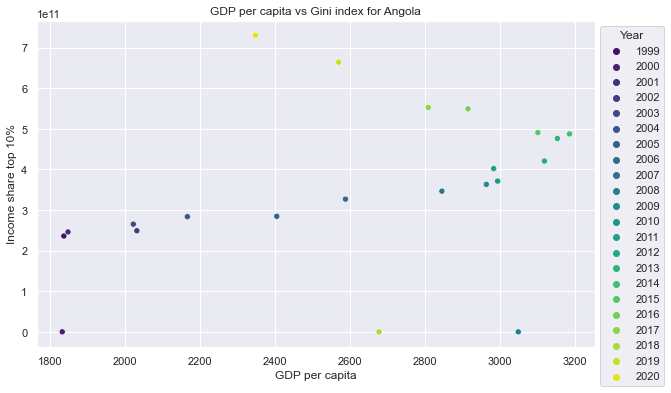

In [189]:
country_name = 'Angola'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == country_name]

fig, ax = plt.subplots(figsize=(10, 6))

scatter = sns.scatterplot(
    data=country_data,
    x='GDP_per_capita',
    y='Income share top 10%',
    hue='Year',
    palette='viridis',
    ax=ax
)

ax.set_title(f"GDP per capita vs Gini index for {country_name}")
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Income share top 10%")
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### Exploring Nigeria's GDP & Inequality Relationship


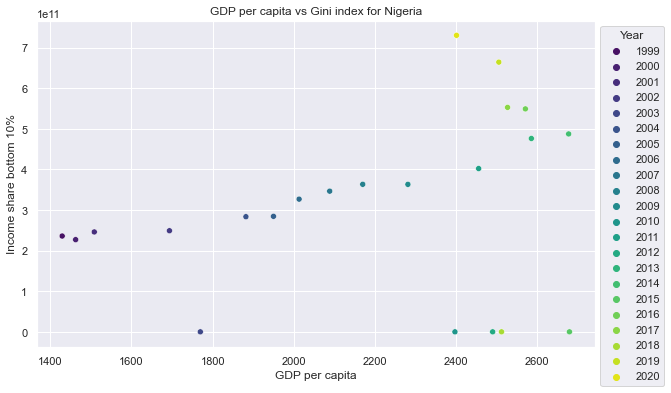

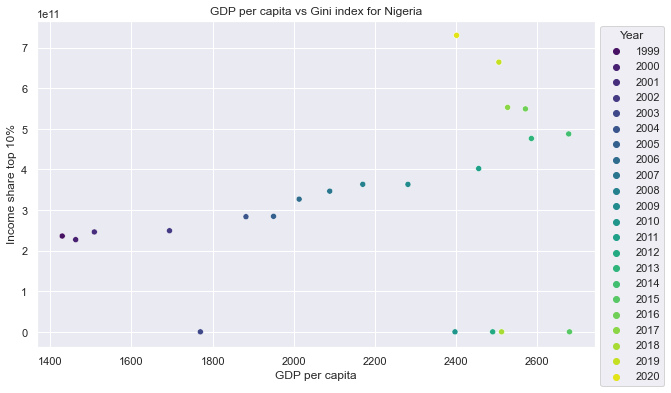

In [192]:
country_name = 'Nigeria'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == country_name]

fig, ax = plt.subplots(figsize=(10, 6))

scatter = sns.scatterplot(
    data=country_data,
    x='GDP_per_capita',
    y='Income share bottom 10%',
    hue='Year',
    palette='viridis',
    ax=ax
)

ax.set_title(f"GDP per capita vs Gini index for {country_name}")
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Income share bottom 10%")
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



fig, ax = plt.subplots(figsize=(10, 6))

scatter = sns.scatterplot(
    data=country_data,
    x='GDP_per_capita',
    y='Income share top 10%',
    hue='Year',
    palette='viridis',
    ax=ax
)

ax.set_title(f"GDP per capita vs Gini index for {country_name}")
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Income share top 10%")
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### Exploring South Africa's GDP & Inequality Relationship

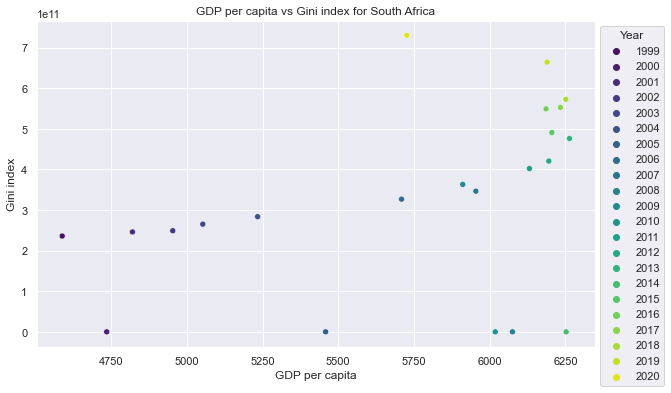

In [204]:
country_name = 'South Africa'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == country_name]

fig, ax = plt.subplots(figsize=(10, 6))

scatter = sns.scatterplot(
    data=country_data,
    x='GDP_per_capita',
    y='Gini_index',
    hue='Year',
    palette='viridis',
    ax=ax
)

ax.set_title(f"GDP per capita vs Gini index for {country_name}")
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Gini index")
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### Exploring Kenya's GDP & Inequality Relationship


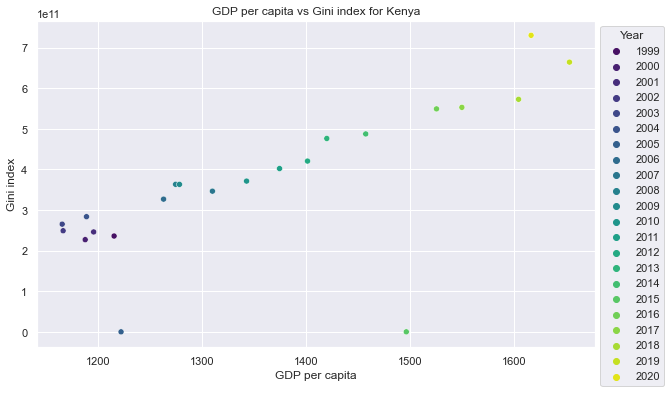

In [199]:
country_name = 'Kenya'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == country_name]

fig, ax = plt.subplots(figsize=(10, 6))

scatter = sns.scatterplot(
    data=country_data,
    x='GDP_per_capita',
    y='Gini_index',
    hue='Year',
    palette='viridis',
    ax=ax
)

ax.set_title(f"GDP per capita vs Gini index for {country_name}")
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Gini index")
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### Exploring Tanzania's GDP & Inequality Relationship


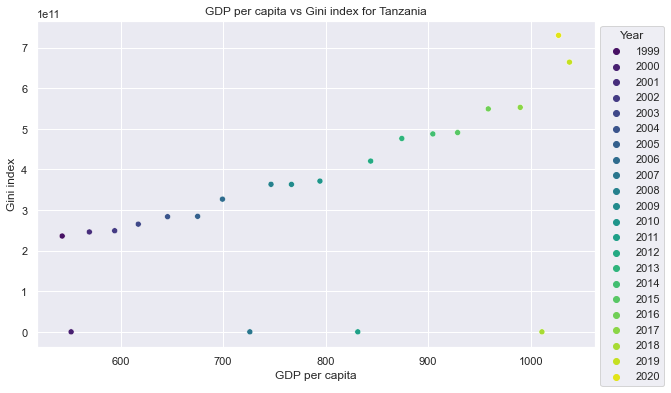

In [200]:
country_name = 'Tanzania'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == country_name]

fig, ax = plt.subplots(figsize=(10, 6))

scatter = sns.scatterplot(
    data=country_data,
    x='GDP_per_capita',
    y='Gini_index',
    hue='Year',
    palette='viridis',
    ax=ax
)

ax.set_title(f"GDP per capita vs Gini index for {country_name}")
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Gini index")
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### Exploring Ethiopia's GDP & Inequality Relationship


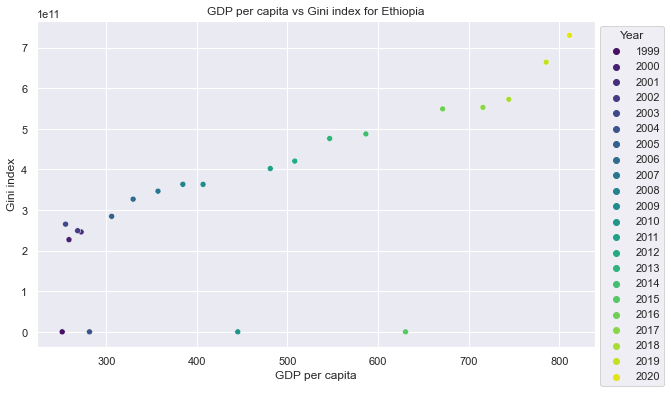

In [201]:
country_name = 'Ethiopia'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == country_name]

fig, ax = plt.subplots(figsize=(10, 6))

scatter = sns.scatterplot(
    data=country_data,
    x='GDP_per_capita',
    y='Gini_index',
    hue='Year',
    palette='viridis',
    ax=ax
)

ax.set_title(f"GDP per capita vs Gini index for {country_name}")
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Gini index")
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### Exploring Eswatini's GDP & Inequality Relationship


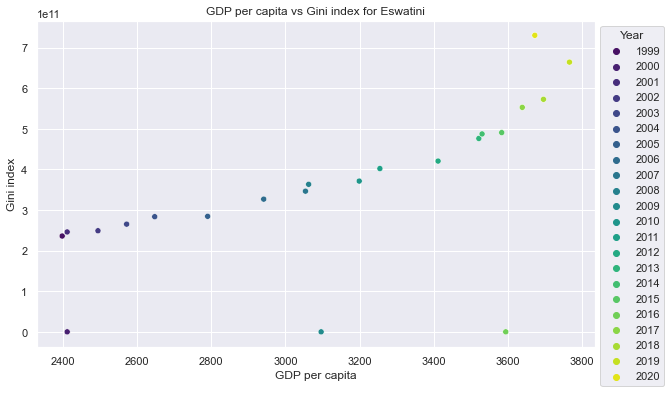

In [202]:
country_name = 'Eswatini'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == country_name]

fig, ax = plt.subplots(figsize=(10, 6))

scatter = sns.scatterplot(
    data=country_data,
    x='GDP_per_capita',
    y='Gini_index',
    hue='Year',
    palette='viridis',
    ax=ax
)

ax.set_title(f"GDP per capita vs Gini index for {country_name}")
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Gini index")
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

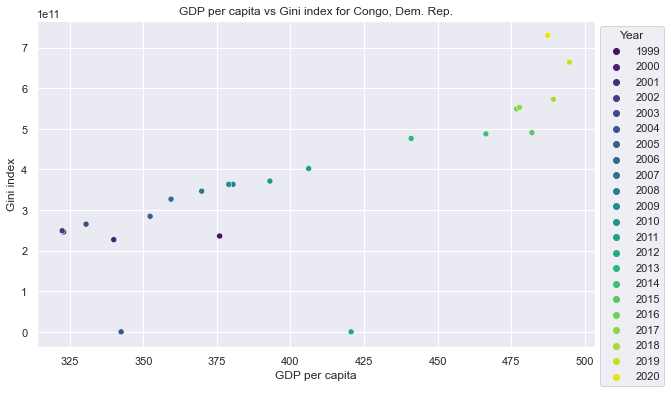

In [203]:
country_name = 'Congo, Dem. Rep.'  
country_data = EDA_subset_one[EDA_subset_one['Country_Name'] == country_name]

fig, ax = plt.subplots(figsize=(10, 6))

scatter = sns.scatterplot(
    data=country_data,
    x='GDP_per_capita',
    y='Gini_index',
    hue='Year',
    palette='viridis',
    ax=ax
)

ax.set_title(f"GDP per capita vs Gini index for {country_name}")
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Gini index")
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [205]:
df.shape


(1166, 106)

In [206]:
EDA_subset_one.shape

(1166, 18)